<a href="https://colab.research.google.com/github/Nicolaser1102/Popularidad_albumes_de_musica/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:11/1/2022
## Fecha de actualización: 11/1/2022
## Esteban Simbaña

#Practica Cargado y filtrado de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Proyecto 2/train.csv'
df = pd.read_csv(nombrearchivo)
df.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [5]:
df.shape

(160000, 45)

Limpieza de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            160000 non-null  int64  
 1   name          160000 non-null  object 
 2   release_date  160000 non-null  object 
 3   artists       160000 non-null  object 
 4   total_tracks  160000 non-null  int64  
 5   t_name0       160000 non-null  object 
 6   t_name1       112284 non-null  object 
 7   t_name2       108467 non-null  object 
 8   t_dur0        160000 non-null  int64  
 9   t_dur1        112284 non-null  float64
 10  t_dur2        108467 non-null  float64
 11  t_dance0      159786 non-null  float64
 12  t_dance1      112159 non-null  float64
 13  t_dance2      108390 non-null  float64
 14  t_energy0     159786 non-null  float64
 15  t_energy1     112159 non-null  float64
 16  t_energy2     108390 non-null  float64
 17  t_key0        159786 non-null  float64
 18  t_ke

Apartamos las columnas que tienen muchos datos faltantes para comprobar si se pueden eliminar

In [7]:
#Se muestran las columnas que tienen datos faltantes
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count_b = miss_values_count[miss_values_count != 0]
miss_values_count_b

t_name1      47716
t_name2      51533
t_dur1       47716
t_dur2       51533
t_dance0       214
t_dance1     47841
t_dance2     51610
t_energy0      214
t_energy1    47841
t_energy2    51610
t_key0         214
t_key1       47841
t_key2       51610
t_mode0        214
t_mode1      47841
t_mode2      51610
t_speech0      214
t_speech1    47841
t_speech2    51610
t_acous0       214
t_acous1     47841
t_acous2     51610
t_ins0         214
t_ins1       47841
t_ins2       51610
t_live0        214
t_live1      47841
t_live2      51610
t_val0         214
t_val1       47841
t_val2       51610
t_tempo0       214
t_tempo1     47841
t_tempo2     51610
t_sig0         214
t_sig1       47841
t_sig2       51610
dtype: int64

Se observa un patrón donde las canciones seleccionadas 2 y 3, en sus características existen una gran parte de datos faltantes.

Ya que el 30% de datos faltantes se consideran que pueden ser eliminadas

En este caso al tener una df extensa se optará a que las columnas que tengan un número grande de filas con datos faltantes, eliminarlas

In [8]:
#creamos lista de nombres de las columnas 
nombres_columnas = list(miss_values_count_b.keys())
nombres_columnas

['t_name1',
 't_name2',
 't_dur1',
 't_dur2',
 't_dance0',
 't_dance1',
 't_dance2',
 't_energy0',
 't_energy1',
 't_energy2',
 't_key0',
 't_key1',
 't_key2',
 't_mode0',
 't_mode1',
 't_mode2',
 't_speech0',
 't_speech1',
 't_speech2',
 't_acous0',
 't_acous1',
 't_acous2',
 't_ins0',
 't_ins1',
 't_ins2',
 't_live0',
 't_live1',
 't_live2',
 't_val0',
 't_val1',
 't_val2',
 't_tempo0',
 't_tempo1',
 't_tempo2',
 't_sig0',
 't_sig1',
 't_sig2']

In [9]:
columnas_drop = []
for i in range (len(miss_values_count_b)):
  if (miss_values_count_b[i] > 220):
      columnas_drop.append(nombres_columnas[i])

In [10]:
columnas_drop

['t_name1',
 't_name2',
 't_dur1',
 't_dur2',
 't_dance1',
 't_dance2',
 't_energy1',
 't_energy2',
 't_key1',
 't_key2',
 't_mode1',
 't_mode2',
 't_speech1',
 't_speech2',
 't_acous1',
 't_acous2',
 't_ins1',
 't_ins2',
 't_live1',
 't_live2',
 't_val1',
 't_val2',
 't_tempo1',
 't_tempo2',
 't_sig1',
 't_sig2']

In [11]:
#eliminamos las filas que contienen datos faltantes 
df1 = df.dropna(subset=columnas_drop)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108348 entries, 0 to 159997
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108348 non-null  int64  
 1   name          108348 non-null  object 
 2   release_date  108348 non-null  object 
 3   artists       108348 non-null  object 
 4   total_tracks  108348 non-null  int64  
 5   t_name0       108348 non-null  object 
 6   t_name1       108348 non-null  object 
 7   t_name2       108348 non-null  object 
 8   t_dur0        108348 non-null  int64  
 9   t_dur1        108348 non-null  float64
 10  t_dur2        108348 non-null  float64
 11  t_dance0      108213 non-null  float64
 12  t_dance1      108348 non-null  float64
 13  t_dance2      108348 non-null  float64
 14  t_energy0     108213 non-null  float64
 15  t_energy1     108348 non-null  float64
 16  t_energy2     108348 non-null  float64
 17  t_key0        108213 non-null  float64
 18  t_ke

Seguimos teniendo un Data Frame bastante extenso, por lo que ahora se mirará las columnas con datos fatltantes que quedan

In [12]:
df1.isnull().sum()

id                0
name              0
release_date      0
artists           0
total_tracks      0
t_name0           0
t_name1           0
t_name2           0
t_dur0            0
t_dur1            0
t_dur2            0
t_dance0        135
t_dance1          0
t_dance2          0
t_energy0       135
t_energy1         0
t_energy2         0
t_key0          135
t_key1            0
t_key2            0
t_mode0         135
t_mode1           0
t_mode2           0
t_speech0       135
t_speech1         0
t_speech2         0
t_acous0        135
t_acous1          0
t_acous2          0
t_ins0          135
t_ins1            0
t_ins2            0
t_live0         135
t_live1           0
t_live2           0
t_val0          135
t_val1            0
t_val2            0
t_tempo0        135
t_tempo1          0
t_tempo2          0
t_sig0          135
t_sig1            0
t_sig2            0
popularity        0
dtype: int64

En este caso imputaremos el valor promedio entre las características de las canciones posteriores (1,2)

In [13]:
df1.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [14]:
df1.reset_index(inplace=True, drop=True)

In [15]:
df1['t_dance0'][590]

nan

In [16]:
#convertimos en lista los valores de la columnas 1 y 2 de la respectiva cancion
lista_td1 = list(df1['t_dance1'])
lista_td2 = list(df1['t_dance2'])

In [17]:
#reemplazamos los valores por el promedio de las caracteristicas propias de las canciones de cada album
df1 = df1.fillna(-1)
lista_td = list(df1['t_dance0'])
for i in range ((len(lista_td))):
  if (lista_td[i] == -1): 
    print(i)
    print(lista_td1[i])
    print(lista_td2[i])
    df1['t_dance0'][i] = ((lista_td1[i]+lista_td2[i])/2)
  


590
0.475
0.561
666
0.621
0.664
994
0.08
0.0721
1797
0.475
0.56
2741
0.621
0.664
4919
0.475
0.56
5204
0.837
0.908
6529
0.475
0.561
8059
0.475
0.56
8335
0.475
0.56
9204
0.475
0.561
10008
0.72
0.482
11164
0.475
0.56
13240
0.475
0.56
13674
0.475
0.56
14549
0.475
0.56
14780
0.475
0.56
15824
0.621
0.664
16056
0.08
0.0721
17237
0.72
0.482
17572
0.475
0.56
18491
0.475
0.56
18910
0.475
0.561
19442
0.475
0.56
20920
0.621
0.664
22894
0.475
0.56
25421
0.621
0.664
28117
0.475
0.56
28494
0.621
0.664
28737
0.572
0.586
29210
0.621
0.664
29322
0.475
0.56
29931
0.475
0.56
32078
0.618
0.439
32914
0.621
0.664
33157
0.325
0.327
33714
0.621
0.664
35141
0.475
0.56
35437
0.621
0.664
36090
0.475
0.56
37001
0.621
0.664
38482
0.475
0.56
38486
0.475
0.56
38554
0.394
0.775
39112
0.475
0.56
39440
0.475
0.56
39699
0.618
0.439
41107
0.838
0.778
41453
0.859
0.861
42610
0.758
0.706
42997
0.475
0.56
44403
0.739
0.678
44773
0.119
0.312
45628
0.713
0.752
45912
0.475
0.56
47276
0.475
0.561
48710
0.292
0.0808
48771
0.475
0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [18]:
df1.shape

(108348, 45)

In [19]:
df1['t_dance0'][590]

0.518

Realizamos el mismo proceso con las otras columnas 

t_energy

In [20]:
#convertimos en lista los valores de la columnas 1 y 2 de la respectiva cancion
lista_te1 = list(df1['t_energy1'])
lista_te2 = list(df1['t_energy2'])

lista_te = list(df1['t_energy0'])
for i in range ((len(lista_te))):
  if (lista_te[i] == -1): 
    df1['t_energy0'][i] = ((lista_te1[i]+lista_te2[i])/2)
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


t_key

In [21]:
lista_tk1 = list(df1['t_key1'])
lista_tk2 = list(df1['t_key2'])
lista_tk = list(df1['t_key0'])

for i in range ((len(lista_tk))):
  if (lista_tk[i] == -1): 
    df1['t_key0'][i] = ((lista_tk1[i]+lista_tk2[i])/2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_mode

In [22]:
lista_tm1 = list(df1['t_mode1'])
lista_tm2 = list(df1['t_mode2'])
lista_tm = list(df1['t_mode0'])

for i in range ((len(lista_tm))):
  if (lista_tm[i] == -1): 
    df1['t_mode0'][i] = ((lista_tm1[i]+lista_tm2[i])/2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_speech

In [23]:
lista_ts1 = list(df1['t_speech1'])
lista_ts2 = list(df1['t_speech2'])
lista_ts = list(df1['t_speech0'])

for i in range ((len(lista_ts))):
  if (lista_ts[i] == -1): 
    df1['t_speech0'][i] = ((lista_ts1[i]+lista_ts2[i])/2)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_acous

In [24]:
lista_ta1 = list(df1['t_acous1'])
lista_ta2 = list(df1['t_acous2'])
lista_ta = list(df1['t_acous0'])

for i in range ((len(lista_ta))):
  if (lista_ta[i] == -1): 
    df1['t_acous0'][i] = ((lista_ta1[i]+lista_ta2[i])/2)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_ins

In [25]:
lista_ti1 = list(df1['t_ins1'])
lista_ti2 = list(df1['t_ins2'])
lista_ti = list(df1['t_ins0'])

for i in range ((len(lista_ti))):
  if (lista_ti[i] == -1): 
    df1['t_ins0'][i] = ((lista_ti1[i]+lista_ti2[i])/2)

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_live 

In [26]:
lista_tl1 = list(df1['t_live1'])
lista_tl2 = list(df1['t_live2'])
lista_tl = list(df1['t_live0'])

for i in range ((len(lista_tl))):
  if (lista_tl[i] == -1): 
    df1['t_live0'][i] = ((lista_tl1[i]+lista_tl2[i])/2)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_val

In [27]:
lista_tv1 = list(df1['t_val1'])
lista_tv2 = list(df1['t_val2'])
lista_tv = list(df1['t_val0'])

for i in range ((len(lista_tv))):
  if (lista_tv[i] == -1): 
    df1['t_val0'][i] = ((lista_tv1[i]+lista_tv2[i])/2)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_tempo

In [28]:
lista_tt1 = list(df1['t_tempo1'])
lista_tt2 = list(df1['t_tempo2'])
lista_tt = list(df1['t_tempo0'])

for i in range ((len(lista_tt))):
  if (lista_tt[i] == -1): 
    df1['t_tempo0'][i] = ((lista_tt1[i]+lista_tt2[i])/2)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


t_sig

In [29]:
lista_tsi1 = list(df1['t_sig1'])
lista_tsi2 = list(df1['t_sig2'])
lista_tsi = list(df1['t_sig0'])

for i in range ((len(lista_tsi))):
  if (lista_tsi[i] == -1): 
    df1['t_sig0'][i] = ((lista_tsi1[i]+lista_tsi2[i])/2)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
df1.isnull().sum()

id              0
name            0
release_date    0
artists         0
total_tracks    0
t_name0         0
t_name1         0
t_name2         0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
dtype: int64

In [31]:
df1.describe()

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
count,108348.000000,108348.000000,1.083480e+05,1.083480e+05,1.083480e+05,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,...,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000,108348.000000
mean,80085.449718,15.720622,2.024607e+05,2.130622e+05,2.142606e+05,0.576725,0.608292,0.609609,0.605821,0.629992,...,0.462549,0.495252,0.485094,119.085269,121.081699,120.604622,3.875932,3.910252,3.902518,51.998754
std,46191.330957,26.673182,1.164210e+05,1.028009e+05,9.507069e+04,0.184017,0.177040,0.179339,0.243762,0.231704,...,0.262441,0.249914,0.252825,31.993972,30.525439,30.930512,0.559925,0.433526,0.465249,21.348850
min,0.000000,3.000000,1.485000e+03,4.120000e+03,4.285000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40091.750000,10.000000,1.491060e+05,1.691460e+05,1.693502e+05,0.459000,0.498000,0.500000,0.449000,0.490000,...,0.246000,0.301000,0.289000,94.814000,96.482000,95.999000,4.000000,4.000000,4.000000,37.000000
50%,80129.500000,13.000000,1.967785e+05,2.038130e+05,2.064530e+05,0.595000,0.631000,0.628000,0.635000,0.661000,...,0.453000,0.502000,0.482000,119.664000,120.012000,119.984000,4.000000,4.000000,4.000000,57.000000
75%,120043.250000,16.000000,2.415910e+05,2.428130e+05,2.449990e+05,0.713000,0.736000,0.743000,0.804000,0.812000,...,0.669000,0.691000,0.682000,140.025000,141.383750,141.015000,4.000000,4.000000,4.000000,69.000000
max,159997.000000,1190.000000,7.200021e+06,7.054236e+06,4.520334e+06,0.988000,0.992000,0.982000,1.000000,1.000000,...,1.000000,1.000000,1.000000,239.713000,248.500000,246.322000,5.000000,5.000000,5.000000,100.000000


De esta manera podemos ver que todos los datos nan que tenían (-1) fueron eliminados y sustituidos

Visualización de datos 

In [32]:
df.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


# Gráfico 1 
Popularidad de los álbumes a través de los años

In [33]:
df1['release_date'].sort_values()

52088           0000
62323           0000
99733           0000
74003           0000
32319           1900
             ...    
30335     2021-09-16
102676    2021-09-16
61163     2021-09-16
72724     2021-09-16
77907     2021-09-16
Name: release_date, Length: 108348, dtype: object

Los datos contienen fechas desde 1900 hasta 2021 

Finalmente tenemos a la df sin datos faltantes y lista para poder utlizarla en lso gráficos

In [34]:
#lista que contendrá la media de la popularidad a través de los años 
popularidad_media = []

In [35]:
#filtraremos datos para obtener filtro desde el inicio (1900) hasta 1950 ya que no hay muchos datos de canciones
interest_filter = df1['release_date'] < '1950-01-01'
df_prueba_less1950 = df1.loc[interest_filter, :]
df_prueba_less1950.head()
df_prueba_less1950.shape

(23, 45)

In [36]:
popularidad_media.append(df_prueba_less1950['popularity'].mean())

In [37]:
#se crean intervalos donde filtraremos los datos de 1950 hasta 1975

interest_filter1975 = df1['release_date'] > '1950-01-01'
interest_filter1975_2 = df1['release_date'] < '1975-01-01'
df_prueba_less1975 = df1.loc[interest_filter1975 & interest_filter1975_2, :]
df_prueba_less1975.head()
df_prueba_less1975.shape

(2392, 45)

In [38]:
popularidad_media.append(df_prueba_less1975['popularity'].mean())

In [39]:
 #se crean intervalos donde filtraremos los datos de 1975 hasta 1985
interest_filter1985 = df1['release_date'] > '1975-01-01'
interest_filter1985_2 = df1['release_date'] < '1985-01-01'
df_prueba_less1985 = df1.loc[interest_filter1985 & interest_filter1985_2, :]
df_prueba_less1985.head()
df_prueba_less1985.shape

(3187, 45)

In [40]:
popularidad_media.append(df_prueba_less1985['popularity'].mean())

In [41]:
 #se crean intervalos donde filtraremos los datos de 1985 hasta 1995

interest_filter1995 = df1['release_date'] > '1985-01-01'
interest_filter1995_2 = df1['release_date'] < '1995-01-01'
df_prueba_less1995 = df1.loc[interest_filter1995 & interest_filter1995_2, :]
df_prueba_less1995.head()
df_prueba_less1995.shape

(4366, 45)

In [42]:
popularidad_media.append(df_prueba_less1995['popularity'].mean())

In [43]:
 #se crean intervalos donde filtraremos los datos de 1995 hasta 2000

interest_filter2000 = df1['release_date'] > '1995-01-01'
interest_filter2000_2 = df1['release_date'] < '2000-01-01'
df_prueba_less2000 = df1.loc[interest_filter2000 & interest_filter2000_2, :]
df_prueba_less2000.head()
df_prueba_less2000.shape

(3715, 45)

In [44]:
popularidad_media.append(df_prueba_less2000['popularity'].mean())

In [45]:
#se crean intervalos donde filtraremos los datos de 2000 hasta 2005
interest_filter2005 = df1['release_date'] > '2000-01-01'
interest_filter2005_2 = df1['release_date'] < '2005-01-01'
df_prueba_less2005 = df1.loc[interest_filter2005 & interest_filter2005_2, :]
df_prueba_less2005.head()
df_prueba_less2005.shape

(4973, 45)

In [46]:
popularidad_media.append(df_prueba_less2005['popularity'].mean())

In [47]:
 #se crean intervalos donde filtraremos los datos de 2005 hasta 2010
interest_filter2010 = df1['release_date'] > '2005-01-01'
interest_filter2010_2 = df1['release_date'] < '2010-01-01'
df_prueba_less2010 = df1.loc[interest_filter2010 & interest_filter2010_2, :]
df_prueba_less2010.head()
df_prueba_less2010.shape

(7079, 45)

In [48]:
popularidad_media.append(df_prueba_less2010['popularity'].mean())

In [49]:
 #se crean intervalos donde filtraremos los datos de 2010 hasta 2015
interest_filter2015 = df1['release_date'] > '2010-01-01'
interest_filter2015_2 = df1['release_date'] < '2015-01-01'
df_prueba_less2015 = df1.loc[interest_filter2015 & interest_filter2015_2, :]
df_prueba_less2015.head()
df_prueba_less2015.shape

(13239, 45)

In [50]:
popularidad_media.append(df_prueba_less2015['popularity'].mean())

In [51]:
 #se crean intervalos donde filtraremos los datos de 2015 hasta 2017
interest_filter2017 = df1['release_date'] > '2015-01-01'
interest_filter2017_2 = df1['release_date'] < '2017-01-01'
df_prueba_less2017 = df1.loc[interest_filter2017 & interest_filter2017_2, :]
df_prueba_less2017.head()
df_prueba_less2017.shape


(9973, 45)

In [52]:
popularidad_media.append(df_prueba_less2017['popularity'].mean())

In [53]:
 #se crean intervalos donde filtraremos los datos de 2017 hasta 2019
interest_filter2019 = df1['release_date'] > '2017-01-01'
interest_filter2019_2 = df1['release_date'] < '2019-01-01'
df_prueba_less2019 = df1.loc[interest_filter2019 & interest_filter2019_2, :]
df_prueba_less2019.head()
df_prueba_less2019.shape


(16030, 45)

In [54]:
popularidad_media.append(df_prueba_less2019['popularity'].mean())

In [55]:
 #se crean intervalos donde filtraremos los datos de todo 2019
interest_filter2020 = df1['release_date'] > '2019-01-01'
interest_filter2020_2 = df1['release_date'] < '2020-01-01'
df_prueba_less2020 = df1.loc[interest_filter2020 & interest_filter2020_2, :]
df_prueba_less2020.head()
df_prueba_less2020.shape

(10348, 45)

In [56]:
popularidad_media.append(df_prueba_less2020['popularity'].mean())

In [57]:
#se crean intervalos donde filtraremos los datos de todo 2020
interest_filter2020_2 = df1['release_date'] > '2020-01-01'
interest_filter2020_2_2 = df1['release_date'] < '2020-12-31'
df_prueba_less2020_2 = df1.loc[interest_filter2020_2 & interest_filter2020_2_2, :]
df_prueba_less2020_2.head()
df_prueba_less2020_2.shape

(14024, 45)

In [58]:
popularidad_media.append(df_prueba_less2020_2['popularity'].mean())

In [59]:
 #se crean intervalos donde filtraremos los datos de todo el 2021 
interest_filter2021 = df1['release_date'] > '2020-12-31'
interest_filter2021_2 = df1['release_date'] < '2021-12-31'
df_prueba_less2021 = df1.loc[interest_filter2021 & interest_filter2021_2, :]
df_prueba_less2021.head()
df_prueba_less2021.shape

(17517, 45)

In [60]:
popularidad_media.append(df_prueba_less2021['popularity'].mean())

In [61]:
lista_años = ['1900-1950','1950-1975','1975-1985','1985-1995','1995-2000','2000-2005','2005-2010',
              '2010-2015','2015-2017','2017-2019','2019','2020','2021']
len(lista_años)

13

In [62]:
len(popularidad_media)

13

In [63]:
x = lista_años 
y = popularidad_media

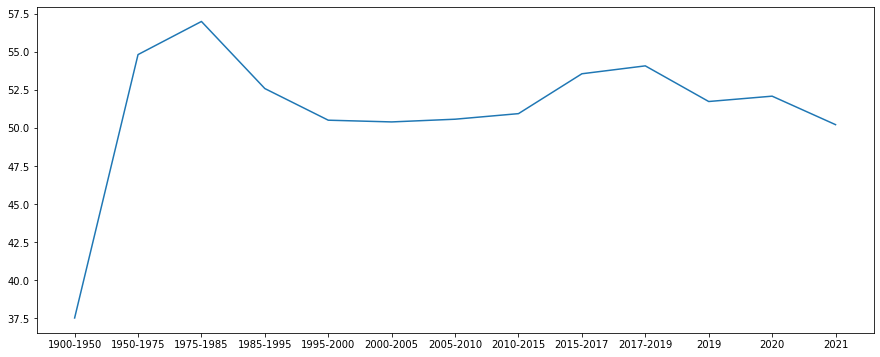

In [64]:
plt.figure(figsize= (15,6))
sns.lineplot(x=x,y= y);

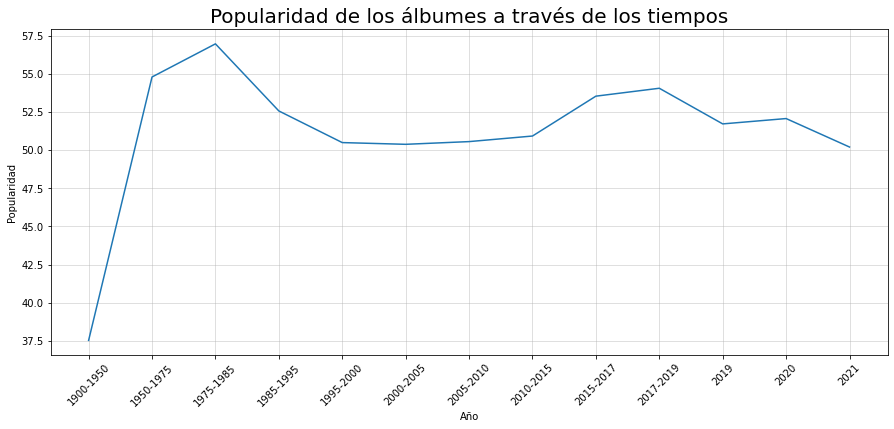

In [65]:
#mejoramos el gráfico
plt.figure(figsize= (15,6))
sns.lineplot(x=x,y= y);
plt.xlabel('Año',fontsize = 10) 
plt.ylabel('Popularidad',fontsize=10)
plt.title('Popularidad de los álbumes a través de los tiempos',fontsize = 20)

plt.xticks(fontsize=10,rotation = 45)
plt.yticks(fontsize= 10)
plt.grid(alpha= 0.5)

Se observa que los álbumes sacados en los años entre 1975 hasta 1985 tienen un gran grado de popularidad, pero los álbumes actuales empiezan a decaer en popularidad

Grafico 2 
Total tracks en los albumes

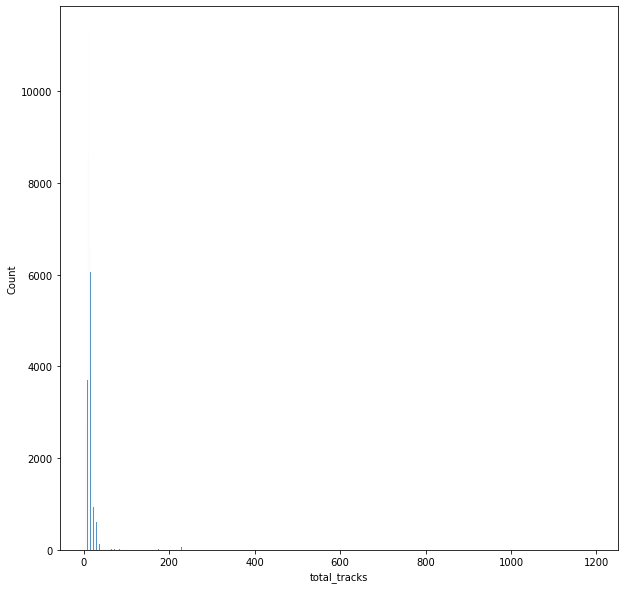

In [68]:
#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = df1.loc[:,'total_tracks']
#creamos el primer histograma

histograma_1 = plt.figure(figsize= (10,10))
sns.histplot(datos_hist1)
pass

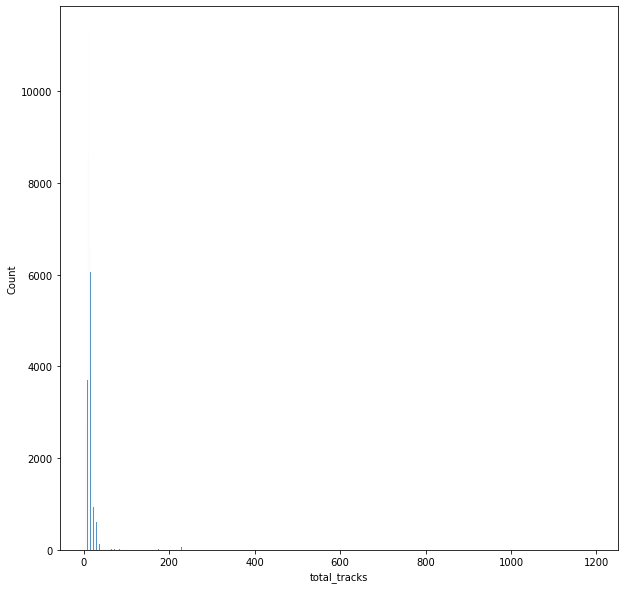

In [69]:
#mejoremos los datos
ddfjsjs = df1[['total_tracks']].drop(df1['total_tracks'].max())
ddfjsjs

#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = ddfjsjs.loc[:,'total_tracks']
#creamos el primer histograma

histograma_1 = plt.figure(figsize= (10,10))
sns.histplot(datos_hist1)
pass

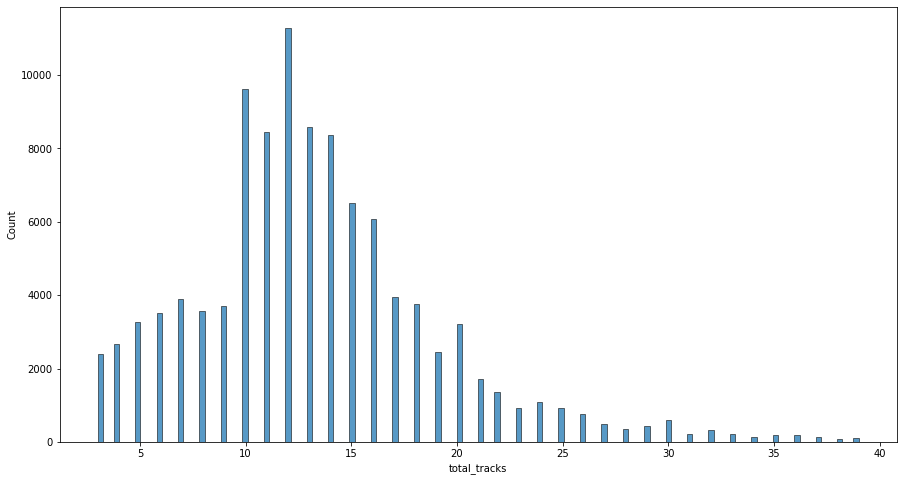

In [70]:
filtro_canciones =  df1['total_tracks'] < 40
df_filtro_canciones = df1.loc[filtro_canciones , :]
df_filtro_canciones.head()
df_filtro_canciones.shape

#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = df_filtro_canciones.loc[:,'total_tracks']
#creamos el primer histograma

histograma_1 = plt.figure(figsize= (15,8))
sns.histplot(datos_hist1)

pass

Los álbumes en su gran mayoría contienen entre 10 y 15 canciones.

Popularidad según el número de tracks

In [71]:
#se crea la lista donde se obtendrá la popularidad media según el numero de canciones 

total_tracks_popularity = []

In [72]:
#crearemos un filtro donde se vean la popularidad de los álbumes que contienen de 0 a 10 canciones
#de 10 a 15 canciones ( que previamente visualizamos son la mayoría)
#de 15 a 40 canciones 
# de 40 canciones a 1200 (maximo de canciones que puede tener un álbum)


#filtro de albumes que cuentas de 0 a 10 canciones 
total_tracks_filtro_10canciones = df1['total_tracks'] > 0
total_tracks_filtro_10canciones1 = df1['total_tracks'] < 10
df_filtro_10canciones = df1.loc[total_tracks_filtro_10canciones & total_tracks_filtro_10canciones1, :]


In [73]:
total_tracks_popularity.append(df_filtro_10canciones['popularity'].mean())

In [74]:
#filtro de albumes que cuentas de 10 a 15 canciones 
total_tracks_filtro_15canciones = df1['total_tracks'] > 10
total_tracks_filtro_15canciones1 = df1['total_tracks'] < 15
df_filtro_15canciones = df1.loc[total_tracks_filtro_15canciones & total_tracks_filtro_15canciones1, :]


In [75]:
total_tracks_popularity.append(df_filtro_15canciones['popularity'].mean())

In [76]:
#filtro de albumes que cuentas de 15 a 40 canciones 
total_tracks_filtro_40canciones = df1['total_tracks'] > 15
total_tracks_filtro_40canciones1 = df1['total_tracks'] < 40
df_filtro_40canciones = df1.loc[total_tracks_filtro_40canciones & total_tracks_filtro_40canciones1, :]

In [77]:
total_tracks_popularity.append(df_filtro_40canciones['popularity'].mean())

In [78]:
#filtro de albumes que cuentas de 40 al maximo de canciones 
total_tracks_filtro_max_canciones = df1['total_tracks'] > 40

df_filtro_max_canciones = df1.loc[total_tracks_filtro_max_canciones, :]

In [79]:
total_tracks_popularity.append(df_filtro_max_canciones['popularity'].mean())

In [80]:
len(total_tracks_popularity)

4

In [81]:
#crearemos un filtro donde se vean la popularidad de los álbumes que contienen de 0 a 10 canciones
#de 10 a 15 canciones ( que previamente visualizamos son la mayoría)
#de 15 a 40 canciones 
# de 40 canciones a 1200 (maximo de canciones que puede tener un álbum)

#creamos lista donde irán los valores de x ticks

total_tracks = ['0-10','10-15','15-40','40-1200']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


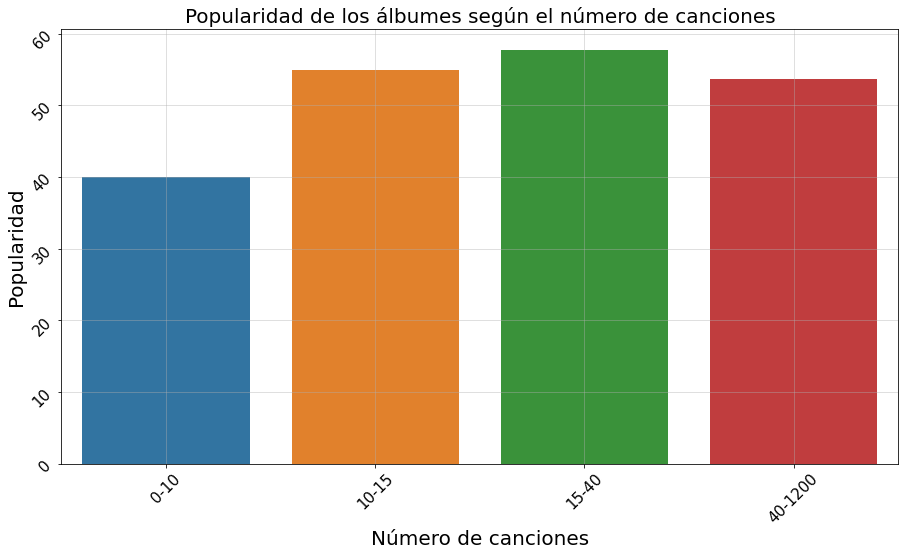

In [82]:

plt.figure(figsize=(15,8))
sns.barplot(total_tracks,total_tracks_popularity)
plt.ylabel('Popularidad', fontsize=20)
plt.xlabel('Número de canciones',fontsize= 20)
plt.title('Popularidad de los álbumes según el número de canciones',fontsize=20)
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(rotation=45,fontsize=15)
plt.grid(alpha = 0.5)
pass

In [83]:
filtro_top_artistas = df1['popularity'].sort_values(ascending=False).head(40).values
filtro_top_artistas

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100])

Como podemos ver en la gráfica los álbumes que contengan entre 10 y 40 canciones o más tendrán muy asegurados podrían obtener un puntaje de popularidad más de 50.

Por lo que un álbum puede conformarse por ejemplo con 15 canciones y tendría una popularidad igual al tener unálbum de 40 canciones o más, lo que significa que los artistas no deben meter tantas canciones en un álbum, lo que reduciría su trabajo

Graficos de popularidad relacionado entre las características de las canciones 

In [84]:
dfxd = pd.DataFrame()

In [85]:
lista_td1 = list(df1['t_dur1'])
lista_td2 = list(df1['t_dur2'])
lista_td = list(df1['t_dur0'])

In [86]:

df_graf_4 = df1 
df_graf_4['t_dur_prom']=5
for i in range ((len(lista_td))):    
  df_graf_4['t_dur_prom'][i] = ((lista_td1[i]+lista_td2[i]+lista_td[i])/3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [87]:
df_graf_4.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51,192284
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67,195199
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81,154768
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53,203866
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70,140693


In [88]:

#filtramos la columna con la que queremos realizar el histograma
datos_graf_4 = df_graf_4.loc[:,['t_dur_prom','popularity']]
#creamos el primer histograma
datos_graf_4.head()


,t_dur_prom,popularity
0,192284,51
1,195199,67
2,154768,81
3,203866,53
4,140693,70


In [89]:
datos_graf_4.sort_values('t_dur_prom', inplace=True)
datos_graf_4.head()

,t_dur_prom,popularity
103207,8759,22
83480,16624,31
31908,16624,31
93472,16624,31
33882,21422,45


In [90]:
datos_graf_4.shape

(108348, 2)

In [91]:
datos_graf_4.max()

t_dur_prom    3799680
popularity        100
dtype: int64

In [92]:
graf_4_x = list(datos_graf_4['t_dur_prom'].head(100000))
graf_4_y = list(datos_graf_4['popularity'].head(100000))

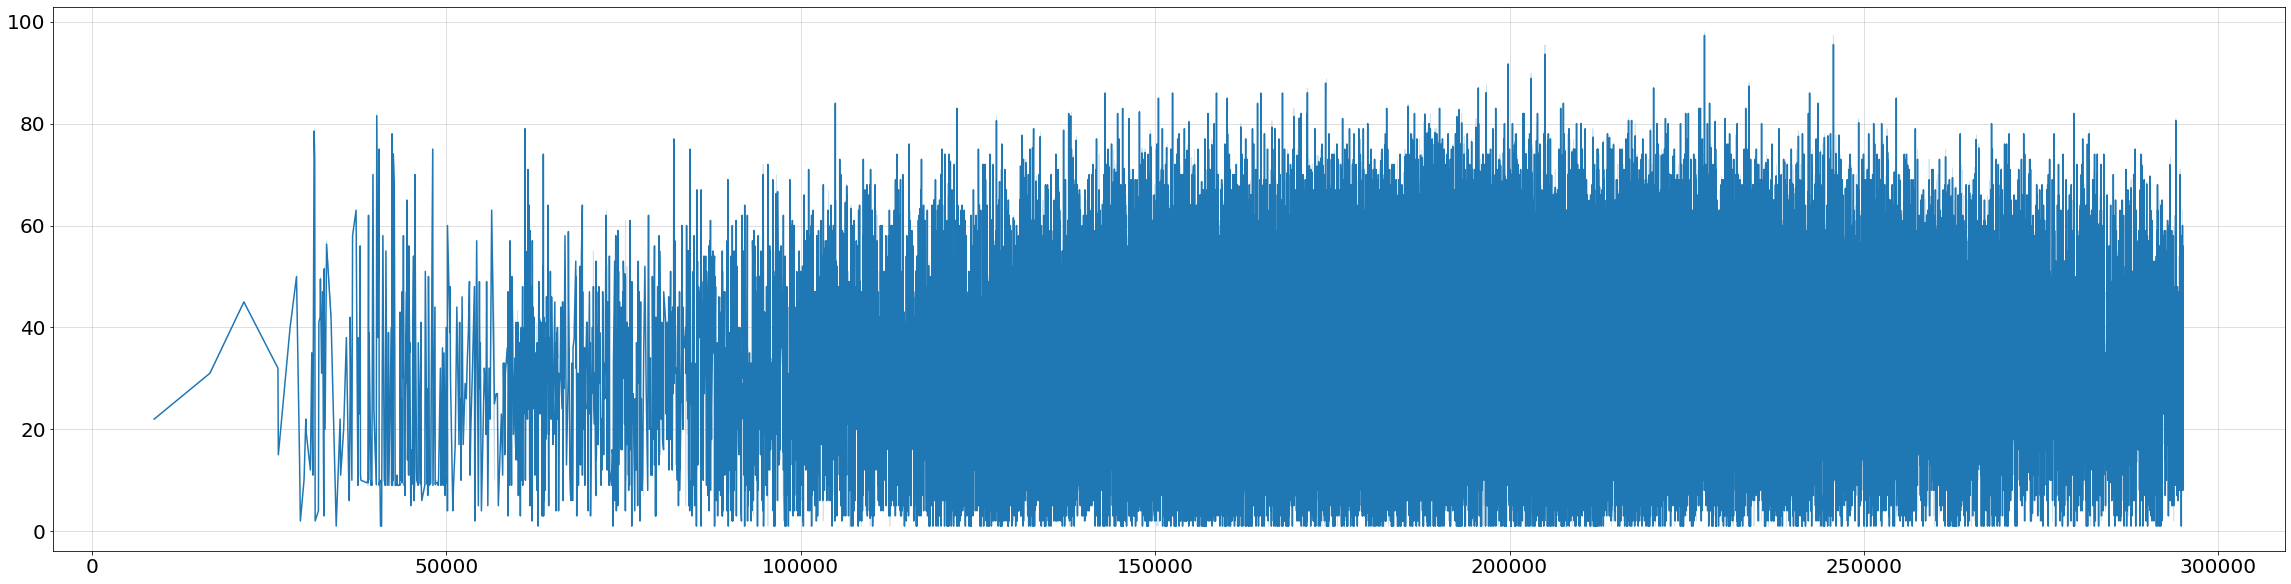

In [93]:
plt.figure(figsize= (40,10))
sns.lineplot(x= graf_4_x,y=graf_4_y)

plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
plt.grid(alpha = 0.5)
pass

El gráfico nos muestra que no importa la duración de las canciones en relación con la popularidad ya que pueden tener bajos o altos números de popularidad teneiendo diferentes niveles de duración 

# Gráfico de acuerdo a la popularidad de las canciones con partes cantadas
Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [94]:
df1.head(1)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51,192284


In [95]:
lista_ts1 = list(df1['t_speech1'])
lista_ts2 = list(df1['t_speech2'])
lista_ts = list(df1['t_speech0'])

In [96]:
df1['t_speech_prom']=5.0
df1['t_speech_prom'].astype(float)
for i in range ((len(lista_td))):    
  df1['t_speech_prom'][i] = (float((lista_ts1[i]+lista_ts2[i]+lista_ts[i])/3.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [97]:
df1.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom,t_speech_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51,192284,0.048967
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67,195199,0.202100
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81,154768,0.272667
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53,203866,0.027467
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70,140693,0.071500


In [98]:
#lista que contrendrá los valores de popularidad de cada intervalo en (t_speech)
total_speech_popularity =[]

In [99]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten (0 hasta 0.33)
speechness_filtro_less_33 = df1['t_speech_prom'] > 0.0
speechness_filtro_less_33_1 = df1['t_speech_prom'] < 0.33
df_filtro_less_33 = df1.loc[speechness_filtro_less_33 & speechness_filtro_less_33_1, :]

total_speech_popularity.append(df_filtro_less_33['popularity'].mean())

In [100]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten(3.33 hasta 6.66)
speechness_filtro_less_66 = df1['t_speech_prom'] > 0.33
speechness_filtro_less_66_1 = df1['t_speech_prom'] < 0.66
df_filtro_less_66 = df1.loc[speechness_filtro_less_66 & speechness_filtro_less_66_1, :]

total_speech_popularity.append(df_filtro_less_66['popularity'].mean())

In [101]:
#filtro de popularidad con respecto a lo álbumes que contengan canciones que se canten(3.33 hasta 6.66)
speechness_filtro_less_100 = df1['t_speech_prom'] > 0.66
speechness_filtro_less_100_1 = df1['t_speech_prom'] < 1.01
df_filtro_less_100 = df1.loc[speechness_filtro_less_100 & speechness_filtro_less_100_1, :]

total_speech_popularity.append(df_filtro_less_100['popularity'].mean())

In [102]:
len(total_speech_popularity)

3

In [103]:
total_speech_popularity

[52.36086618894557, 47.65505341002465, 27.898190045248867]

In [104]:
#creamos lista para poner los diferentes intervalos
intervalos_lista = []
intervalos_lista = ['0-0.33','0.33-0.66','0.66-1']

In [105]:
len(intervalos_lista)

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


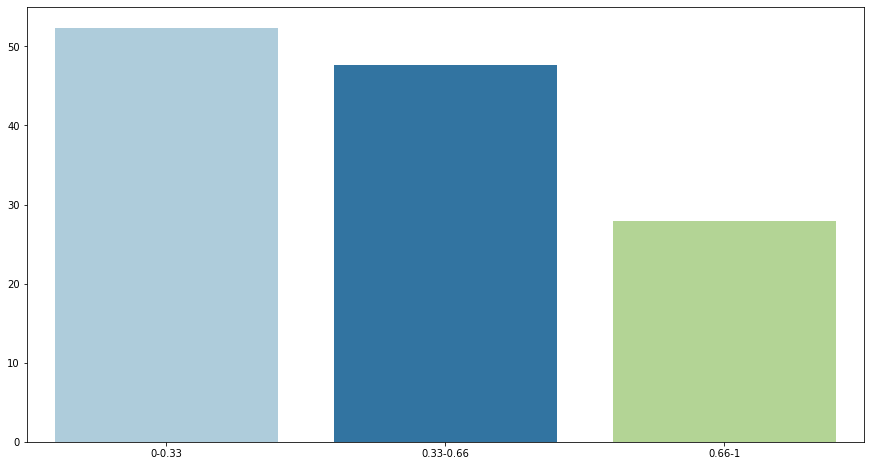

In [106]:
plt.figure(figsize=(15,8))
sns.barplot(intervalos_lista,total_speech_popularity,palette="Paired")

pass

La gráfica nos muestra que las canciones que tienen más sonido instrumental en toda la canción son más populares que las canciones que tienen mucha presencia de palabras cantadas por el artista

# Modelos de predicción

Random Forest para predecir la popularidad de los álbumes de música de acuerdo a las características de sus canciones.

In [108]:
#df con la que realizaremos el modelaje de datos 
df1.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom,t_speech_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51,192284,0.048967
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67,195199,0.202100
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81,154768,0.272667
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53,203866,0.027467
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70,140693,0.071500


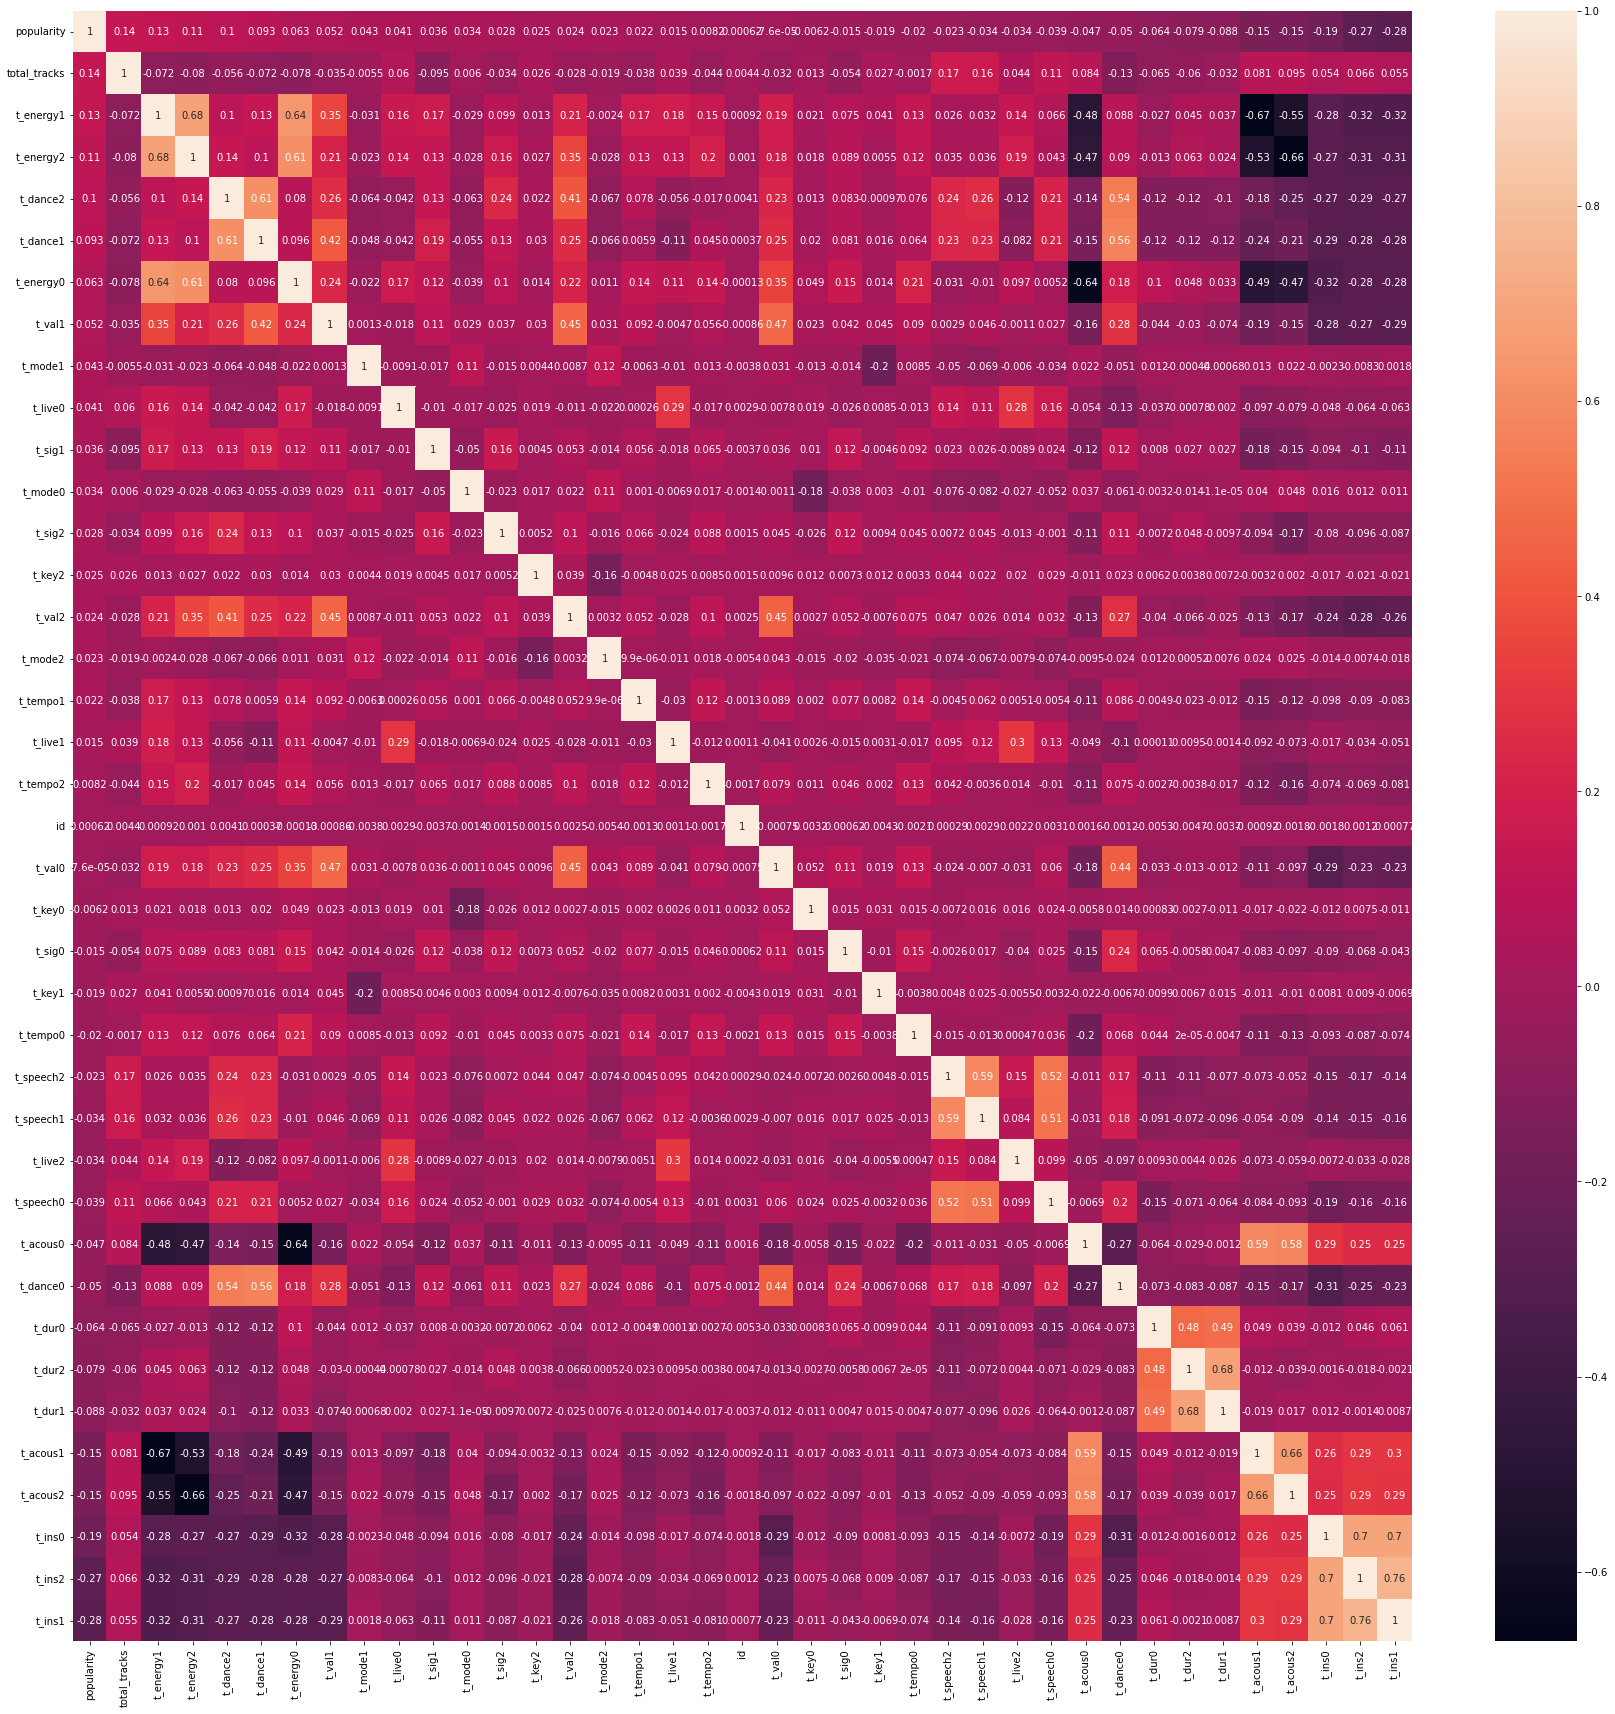

In [107]:
corr = df.corr()
corr_cols = corr['popularity'].sort_values(ascending = False).head(60).index
corr_SalePrice = df[corr_cols].corr()
plt.subplots(figsize = (30, 30))
sns.heatmap(corr_SalePrice, annot = True)

Las columnas que tienen una correlación positiva en relación al vector objetivo (popularidad)  son:

- t_energy (0,1,2)
- t_dance (0,1,2)
- t_val(0,1,2)
- t_speech(0,1,2)
- t_inst(0,1,2)
- t_acous(0,1,2)
- t_dura(0,1,2)


Para las variables independendientes solo tomaremos las columnas con correlación positiva con la variable objetivo (popularidad)

In [110]:
df1.head(1)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,t_dur_prom,t_speech_prom
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51,192284,0.048967


In [111]:
df1.columns

Index(['id', 'name', 'release_date', 'artists', 'total_tracks', 't_name0',
       't_name1', 't_name2', 't_dur0', 't_dur1', 't_dur2', 't_dance0',
       't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0',
       't_key1', 't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0',
       't_speech1', 't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0',
       't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
       't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1',
       't_sig2', 'popularity', 't_dur_prom', 't_speech_prom'],
      dtype='object')

In [112]:
columnas = ['t_dur0'	,'t_dur1', 't_dur2',
             't_energy0', 't_energy1', 't_energy2',
              't_dance0','t_dance1', 't_dance2',
              't_val0', 't_val1','t_val2',
              't_speech0','t_speech1', 't_speech2',
               't_ins0','t_ins1', 't_ins2',
                't_acous0', 't_acous1', 't_acous2',
                  't_dur0', 't_dur1', 't_dur2']

In [120]:
X_train = df1.loc[:,columnas]
X_train.shape

(108348, 24)

In [122]:
y_train = df1['popularity']
y_train.shape

(108348,)

Importamos liberías para el modelo 

In [118]:
#importamos librería para random forest 
from sklearn.ensemble import RandomForestRegressor


In [119]:
#instanciamos el modelo
random_forest_model = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True) #todos estos valores ya están incluidos por defecto

In [123]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

Importamos la base de datos de prueba

In [136]:
csv_prueba = '/content/drive/MyDrive/Coding Dojo/Proyecto 2/test.csv'
df_prueba = pd.read_csv(csv_prueba)
df_prueba.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2
0,160000,Vizlaxy One,2021-08-24,"The Vizlaxy,",11,Ciko,Kumne,Pod Sem,34901,33343.0,...,0.0785,0.0397,0.0381,0.0374,89.674,84.987,122.585,3.0,4.0,4.0
1,160001,OTW (Acoustic Version),2018-06-25,"Missy & Blonde,",1,OTW - Acoustic Version,NaN,NaN,201655,NaN,...,NaN,0.5300,NaN,NaN,129.998,NaN,NaN,4.0,NaN,NaN
2,160002,Ocean Avenue,2003-01-01,"Yellowcard,",13,Way Away,Breathing,Ocean Avenue,202093,218706.0,...,0.0947,0.3640,0.5700,0.7860,179.644,179.581,173.734,4.0,4.0,4.0
3,160003,Bloomsday (Remastered),2018-02-16,"Esbe,",19,Float - Remastered,Fulfill / The Dream - Remastered,Wanderlust - Remastered,182783,416000.0,...,0.2600,0.4560,0.1070,0.5830,194.107,89.533,134.016,3.0,4.0,4.0
4,160004,Miss You,2021-09-03,"SLANDER, Ganja White Night,",1,Miss You,NaN,NaN,200000,NaN,...,NaN,0.0526,NaN,NaN,74.473,NaN,NaN,4.0,NaN,NaN


In [137]:
X_test = df_prueba.loc[:,columnas]
X_test = X_test.dropna()

In [138]:

X_test.shape

(14384, 24)

In [139]:
y_test = random_forest_model.predict(X_test)

In [140]:
y_test.shape

(14384,)

In [134]:
score = random_forest_model.score(X_test, y_test)

In [135]:
score

1.0